In [ ]:
import PIL as p
import numpy as np
import matplotlib.pyplot as plt
import base64
import json  
import itertools
import copy                  

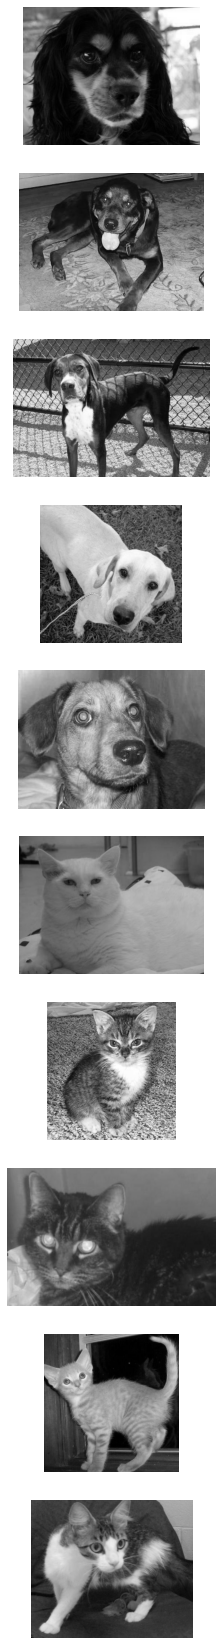

In [ ]:
def to_greyscale(files):
  dic = {}
  fig = plt.figure(figsize=(30,30))
  for i, file in enumerate(files):
    img = p.Image.open(file)
    width, height = img.size
    for row in range(0, height):
      for col in range(0, width):
        [r,g,b] = img.getpixel((col,row))
        avg= int((r+g+b)/3)
        img.putpixel((col,row), ( int(avg),int(avg),int(avg) ))
    img.save("temp.jpg")
    fig.add_subplot(len(files),1,i+1)
    plt.axis('off')
    plt.imshow(plt.imread("/content/temp.jpg"))
    with open("outputfile.json", "a") as file:
      json.dump(img.tobytes().decode("latin1"), file)

lst = ["/content/dog1.jpg","/content/dog2.jpg","/content/dog3.jpg","/content/dog4.jpg","/content/dog5.jpg","/content/cat1.jpg","/content/cat2.jpg","/content/cat3.jpg","/content/cat4.jpg","/content/cat5.jpg"]
to_greyscale(lst)

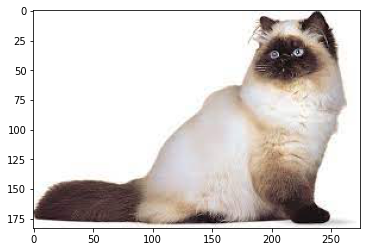

In [ ]:
plt.imshow(plt.imread("/content/cat1.jpg"))

[[1, 0, 0], [0, 5, 0], [1, -1, -1]]
[[-1, -1, 1], [0, 5, 0], [0, 0, 1]]


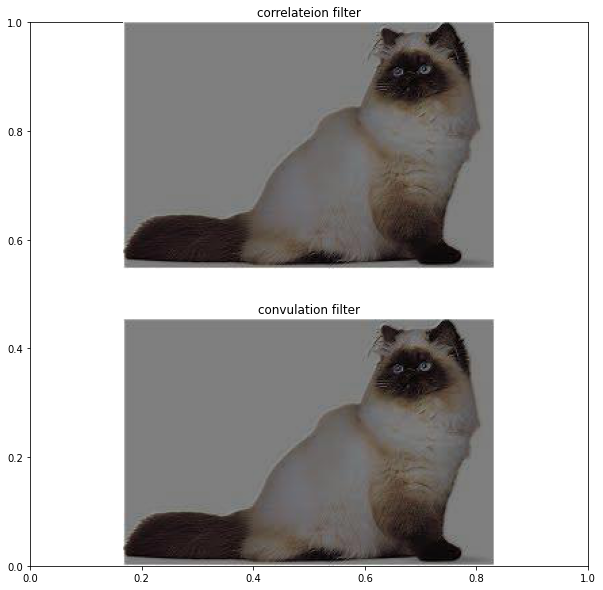

In [ ]:
def filter(files):
  fig = plt.figure(figsize=(10,10))
  corr_filter = [[1,0,0],[0,5,0],[1,-1,-1]] #brightens the image
  conv_filter = copy.deepcopy(corr_filter)
  conv_filter.reverse()
  for i in conv_filter:
    i.reverse()
  print(corr_filter)
  print(conv_filter)
  channels = [[],[],[]]
  for i, file in enumerate(files):
    img = p.Image.open(file)
    img2 = copy.deepcopy(img)
    width, height = img.size
    channels = [[],[],[]]
    for row in range(0, height):
      channels[0].append([])
      channels[1].append([])
      channels[2].append([])
      for col in range(0, width):
        [r,g,b] = img.getpixel((col,row))
        channels[0][row].append(r)
        channels[1][row].append(g)
        channels[2][row].append(b)
    img2_ch = copy.deepcopy(channels)
    for ch in channels:
      for r, rows in enumerate(ch):
        for c,value in enumerate(rows):
          if r == 0 or c == 0 or r == len(ch) - 1 or c == len(rows) - 1:
            pass;
          else:
            origin = value*corr_filter[1][1]
            origin += ch[r][c-1]*corr_filter[1][0]
            origin += ch[r][c+1]*corr_filter[1][2]
            origin += ch[r-1][c]*corr_filter[0][1]
            origin += ch[r+1][c]*corr_filter[2][1]
            origin += ch[r-1][c-1]*corr_filter[0][0]
            origin += ch[r-1][c+1]*corr_filter[0][2]
            origin += ch[r+1][c-1]*corr_filter[2][0]
            origin += ch[r+1][c+1]*corr_filter[2][2]
            ch[r][c] = int(origin/9)
    for ch in img2_ch:
      for r, rows in enumerate(ch):
        for c,value in enumerate(rows):
          if r == 0 or c == 0 or r == len(ch) - 1 or c == len(rows) - 1:
            pass;
          else:
            origin = value*corr_filter[1][1]
            origin += ch[r][c-1]*corr_filter[1][0]
            origin += ch[r][c+1]*corr_filter[1][2]
            origin += ch[r-1][c]*corr_filter[0][1]
            origin += ch[r+1][c]*corr_filter[2][1]
            origin += ch[r-1][c-1]*corr_filter[0][0]
            origin += ch[r-1][c+1]*corr_filter[0][2]
            origin += ch[r+1][c-1]*corr_filter[2][0]
            origin += ch[r+1][c+1]*corr_filter[2][2]
            ch[r][c] = int(origin/9)
    ro=0
    co=0
    for r,g,b,rr,gg,bb in zip(channels[0],channels[1],channels[2],img2_ch[0],img2_ch[1],img2_ch[2]):
      co=0
      for r1,r2,r3,rr1,rr2,rr3 in zip(r,g,b,rr,gg,bb):
        img.putpixel((co,ro),(r1,r2,r3))
        img2.putpixel((co,ro),(rr1,rr2,rr3))
        co+=1
      ro+=1
    img.save("temp.jpg")
    img2.save("temp2.jpg")
    plt.title("correlateion filter")
    fig.add_subplot(len(files)*2,1,i+1)
    plt.axis('off')
    plt.imshow(plt.imread("/content/temp.jpg"))
    fig.add_subplot(len(files)*2,1,i+2)
    plt.axis('off')
    plt.title("convulation filter")
    plt.imshow(plt.imread("/content/temp2.jpg"))

lst = ["/content/cat1.jpg"]
filter(lst)